In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")  # append parent dir to sys.path

In [30]:
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from yellowbrick.model_selection import rfecv, learning_curve, feature_importances

In [31]:
import wind_constants as cst
from feature_engineering import polynomial_features_labeled, add_inertia

In [32]:
# plt.rcParams.update(params)
# sns.set_style("white")

In [53]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from sklearn.model_selection import train_test_split, KFold

In [34]:
data = joblib.load("../data/processed/processed_uncleaned.joblib")

In [35]:
plt.rcParams.update(
    {
        "figure.figsize": (30, 15),
    }
)

## Initial Features RFECV 

In [36]:
data = data[cst.FEATURES + [cst.TARGET]].dropna()

In [37]:
X, y = data[cst.FEATURES], data[cst.TARGET]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

In [39]:
cv = KFold(3)
# visualizer = rfecv(LassoCV(n_jobs=4), X=X_train, y=y_train, cv=cv, scoring="r2")

In [40]:
# learning_curve(LassoCV(), X_train, y_train, scoring="r2")

In [41]:
# learning_curve(RandomForestRegressor(n_jobs=4), X_train, y_train, scoring="r2")

# Inertia Features

In [15]:
data_inertia = add_inertia(data=X_train).dropna()

../feature_engineering.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{column}_diff_{step}"] = data[column].diff(step)
../feature_engineering.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{column}_shift_{step}"] = data[column].shift(step)


In [16]:
data_inertia_test = add_inertia(data=X_test).dropna()

../feature_engineering.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{column}_diff_{step}"] = data[column].diff(step)
../feature_engineering.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{column}_shift_{step}"] = data[column].shift(step)


## Lasso with inertia features

In [17]:
lasso = LassoCV(normalize=True)
lasso.fit(X=data_inertia, y=y_train[data_inertia.index])

LassoCV(normalize=True)

In [18]:
lasso.score(X=data_inertia_test, y=y_test[data_inertia_test.index])

0.8863423870139149

In [47]:
dict_coef = {
    key: value for key, value in zip(data_inertia.columns.tolist(), lasso.coef_)
}

In [48]:
sorted_coef_ = {
    key: value
    for key, value in sorted(
        dict_coef.items(), key=lambda item: abs(item[1]), reverse=True
    )
    if abs(value) > 10 ** -4
}

In [55]:
# sorted_coef_

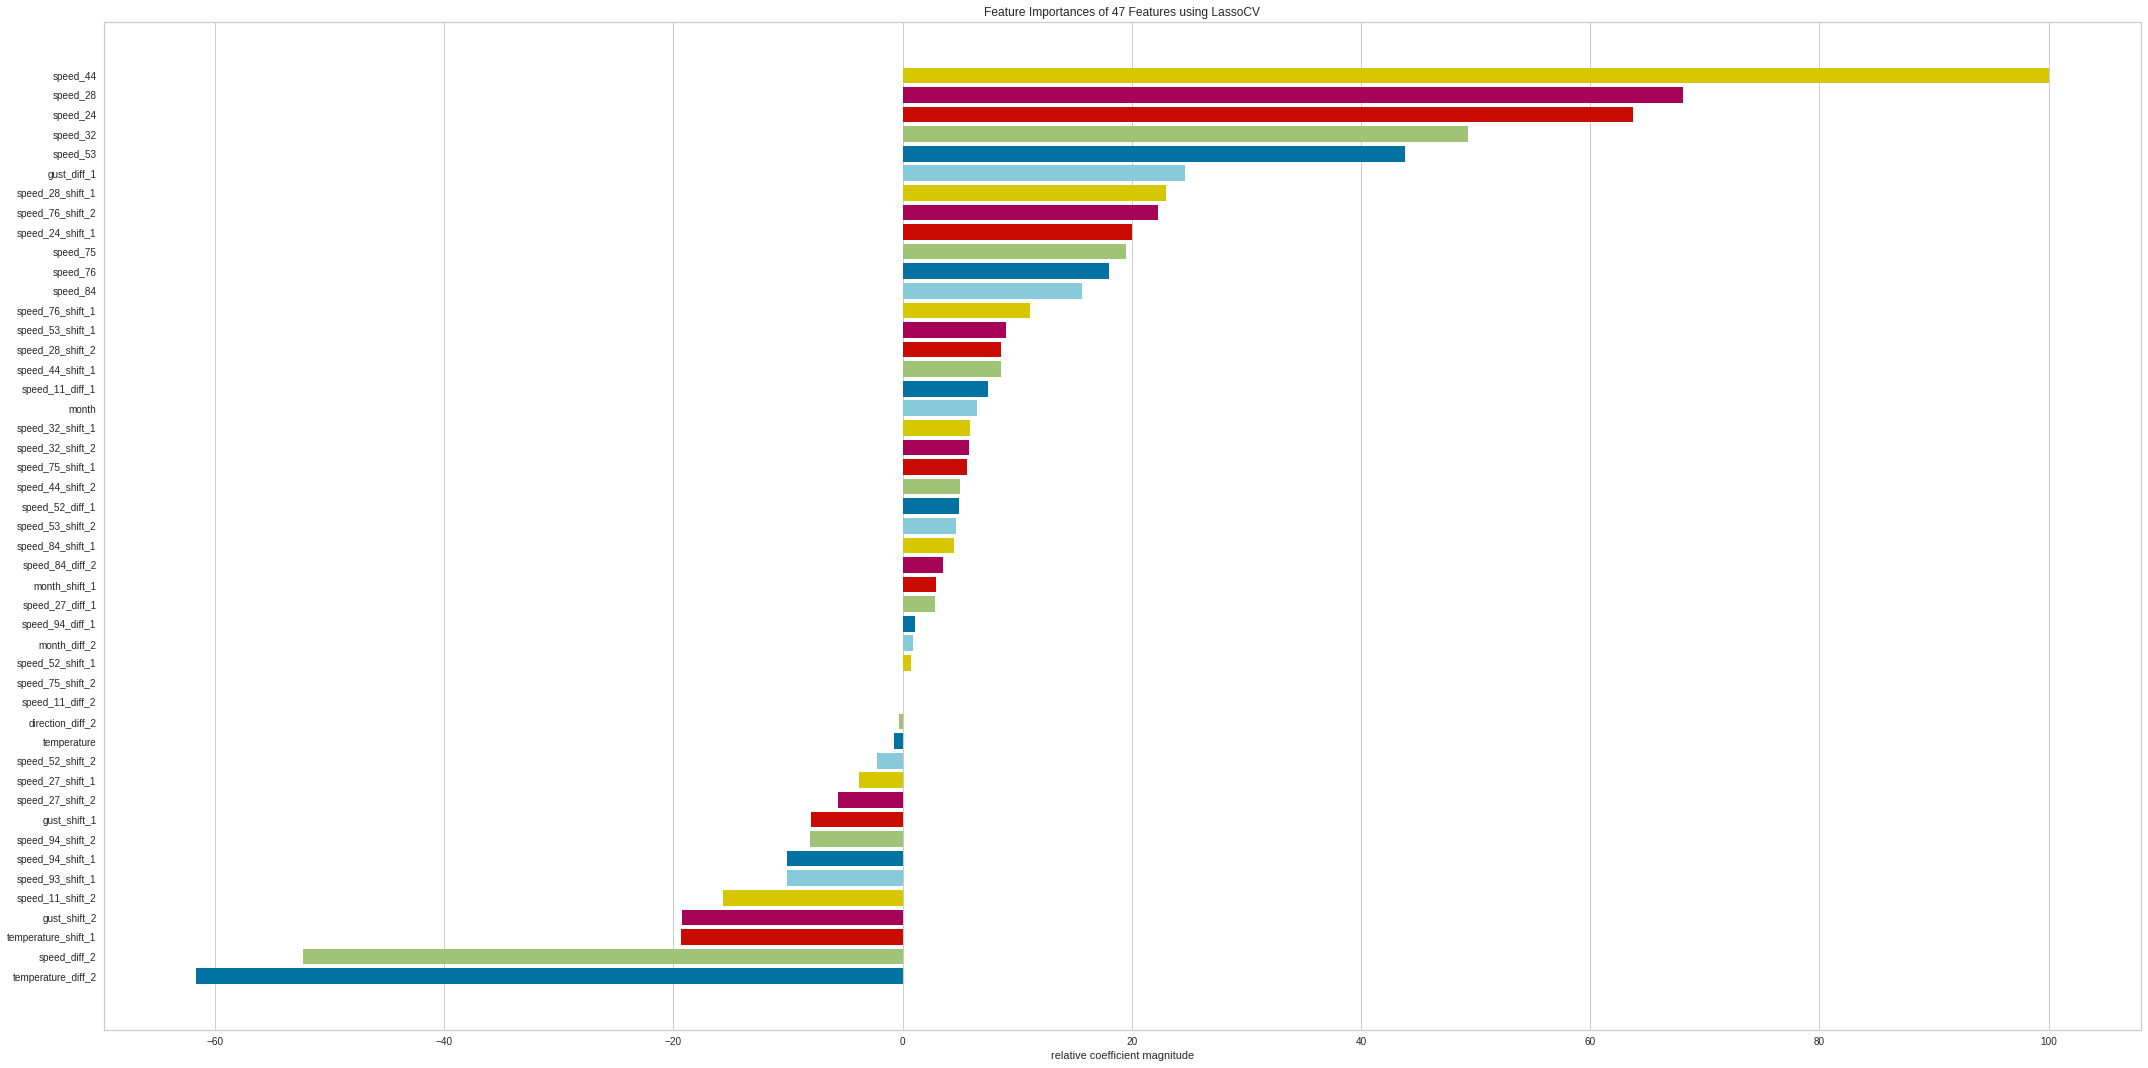

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 47 Features using LassoCV'}, xlabel='relative coefficient magnitude'>,
                   model=None)

In [57]:
feature_importances(
    LassoCV(normalize=True),
    data_inertia[sorted_coef_.keys()],
    y_train[data_inertia.index],
)

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


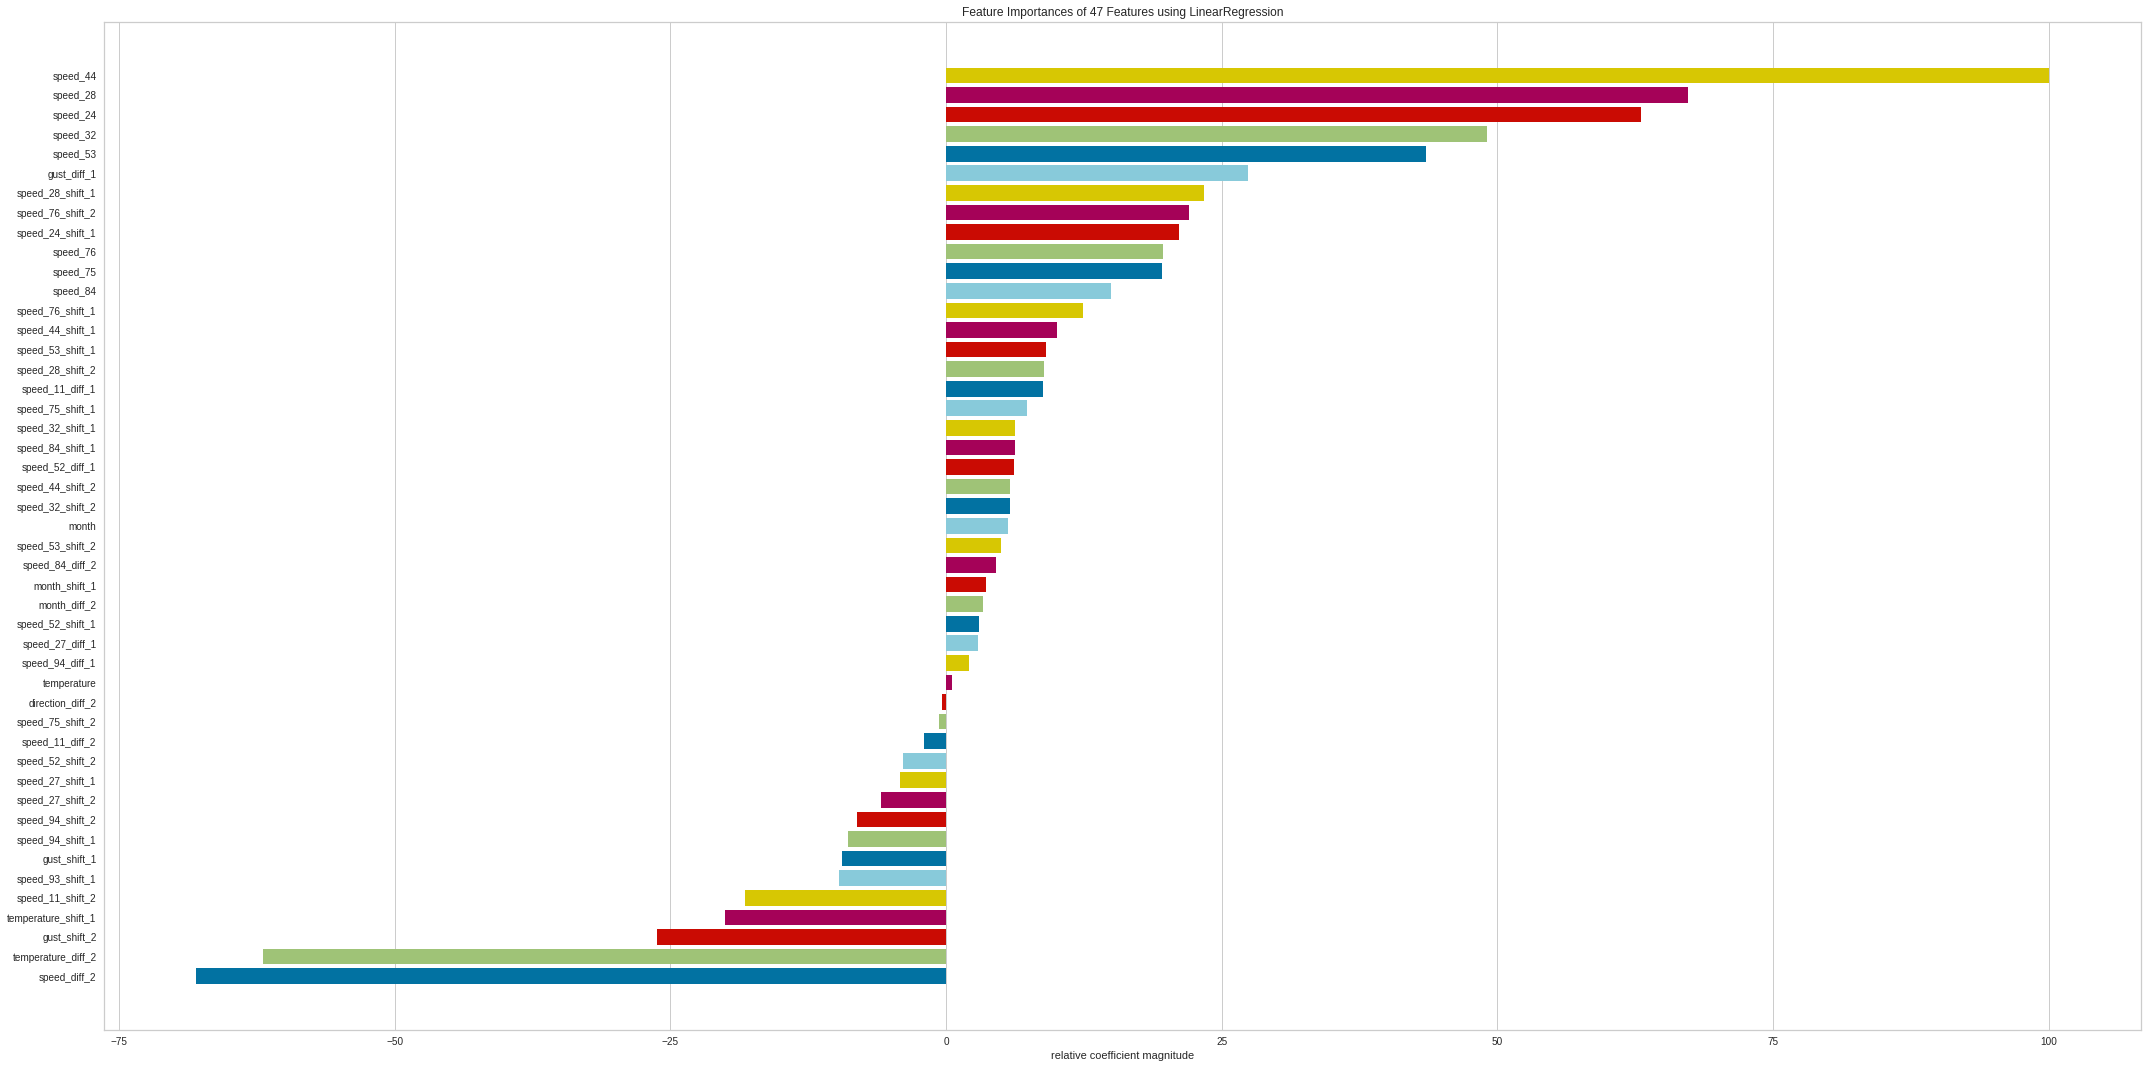

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 47 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>,
                   model=None)

In [54]:
feature_importances(
    LinearRegression(normalize=True),
    data_inertia[sorted_coef_.keys()],
    y_train[data_inertia.index],
)

## RF with inertia features

In [22]:
rf = RandomForestRegressor(n_jobs=4).fit(X=data_inertia, y=y_train[data_inertia.index])

In [23]:
rf.score(X=data_inertia_test, y=y_test[data_inertia_test.index])

0.8939708504714354

In [26]:
dict_coef_rf = {
    key: value
    for key, value in zip(data_inertia.columns.tolist(), rf.feature_importances_)
}

In [62]:
sorted_coef_RF = {
    key: value
    for key, value in sorted(
        dict_coef_rf.items(), key=lambda item: abs(item[1]), reverse=True
    )
    if abs(value) > 10 ** -3
}

In [64]:
# sorted_coef_RF

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


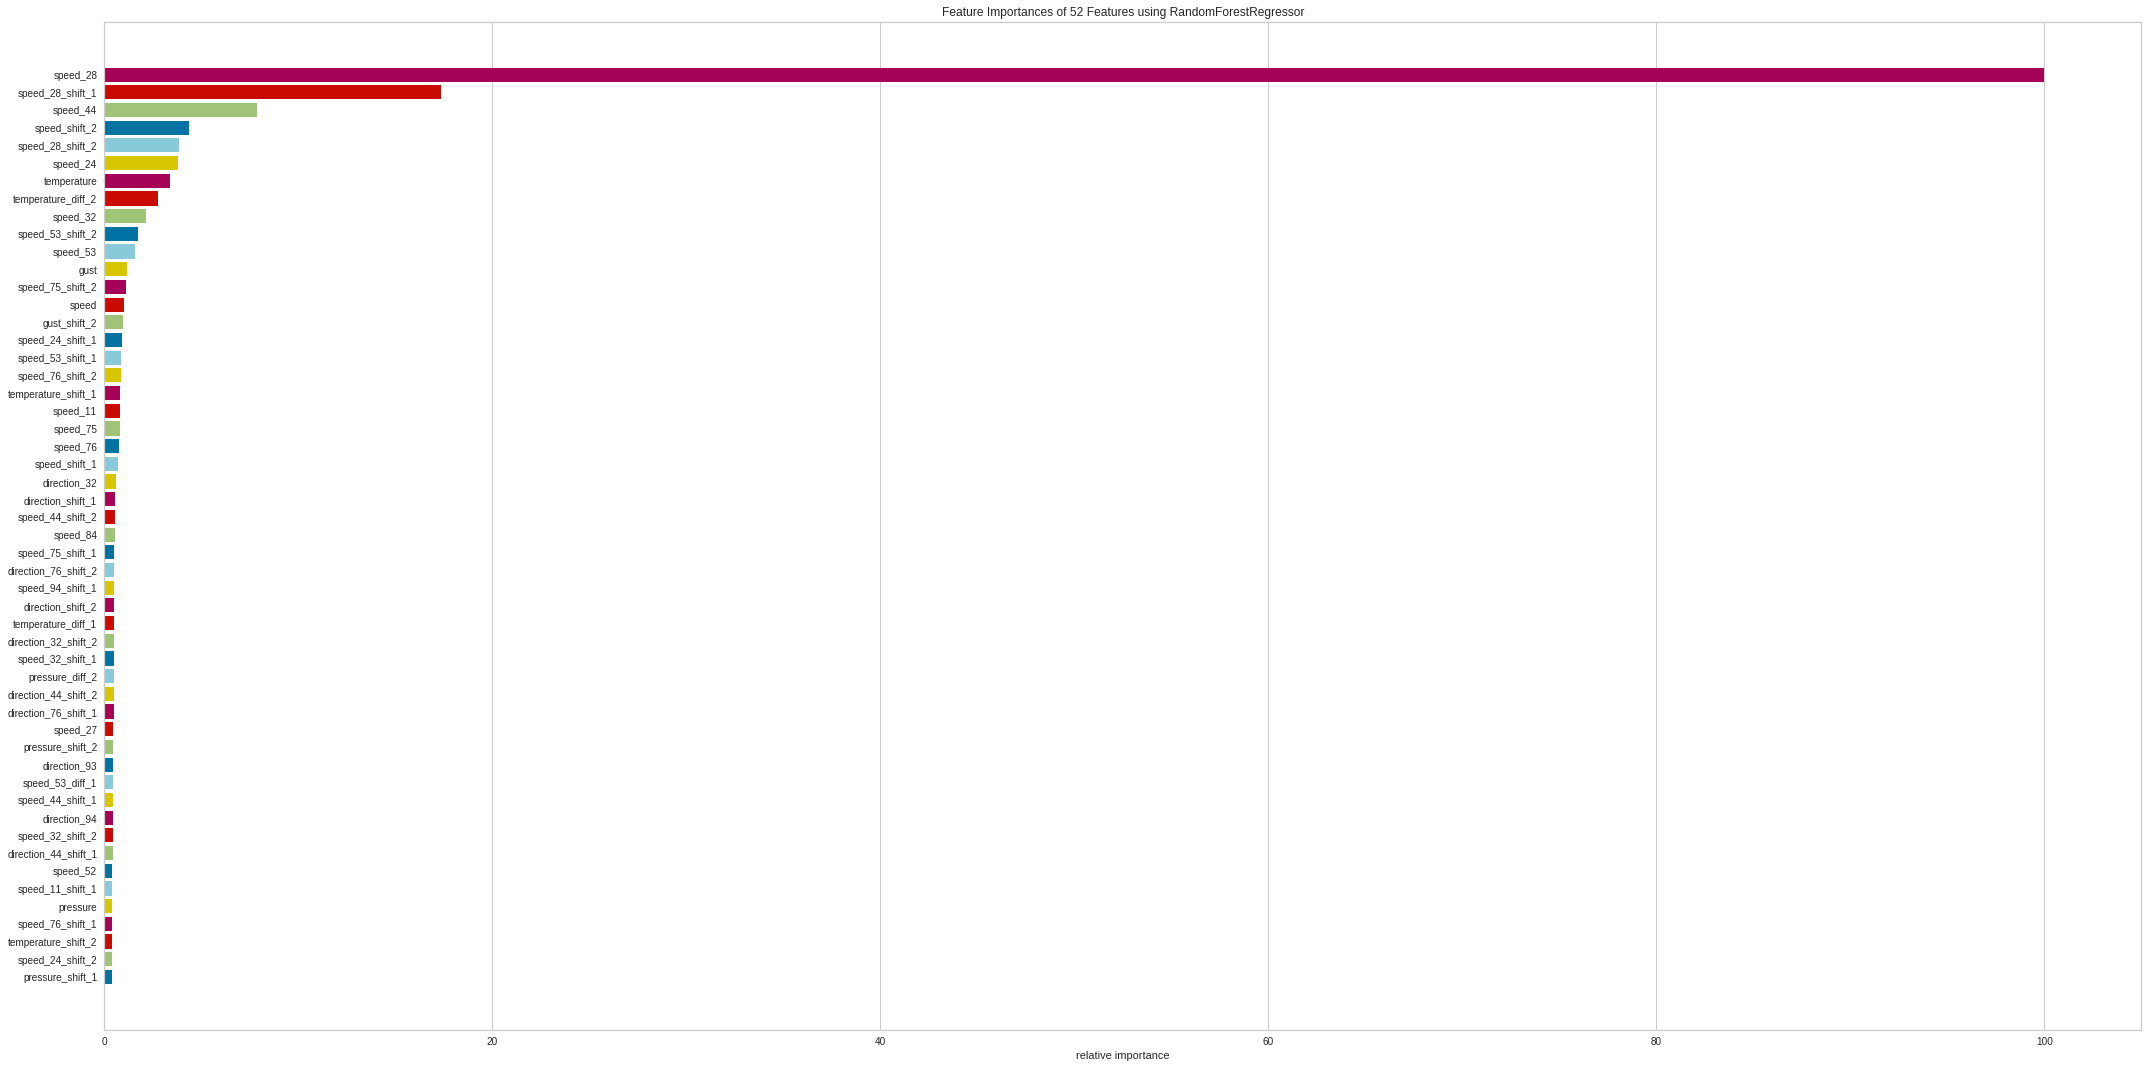

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 52 Features using RandomForestRegressor'}, xlabel='relative importance'>,
                   model=None)

In [65]:
feature_importances(
    RandomForestRegressor(n_jobs=4),
    data_inertia[sorted_coef_RF.keys()],
    y_train[data_inertia.index],
)

# Polynomial Features

In [70]:
data_poly_train = polynomial_features_labeled(X_train)
data_poly_test = polynomial_features_labeled(X_test)

## Lasso with Polynomial features

In [71]:
lasso = LassoCV(normalize=True)
lasso.fit(X=data_poly_train, y=y_train)

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025106442609413193, tolerance: 0.023865361528974907
  tol, rng, random, positive)
/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03543942654255261, tolerance: 0.02431891268694722
  tol, rng, random, positive)
/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031021747502322228, tolerance: 0.02431891268694722
  tol, rng, random, positive)
/hom

LassoCV(normalize=True)

In [72]:
lasso.score(X=data_poly_test, y=y_test)

0.8624046236737413

In [77]:
dict_coef = {
    key: value for key, value in zip(data_poly_train.columns.tolist(), lasso.coef_)
}

In [96]:
sorted_coef_ = {
    key: value
    for key, value in sorted(
        dict_coef.items(), key=lambda item: abs(item[1]), reverse=True
    )
    if abs(value) > 10 ** -3.2
}

In [97]:
# sorted_coef_

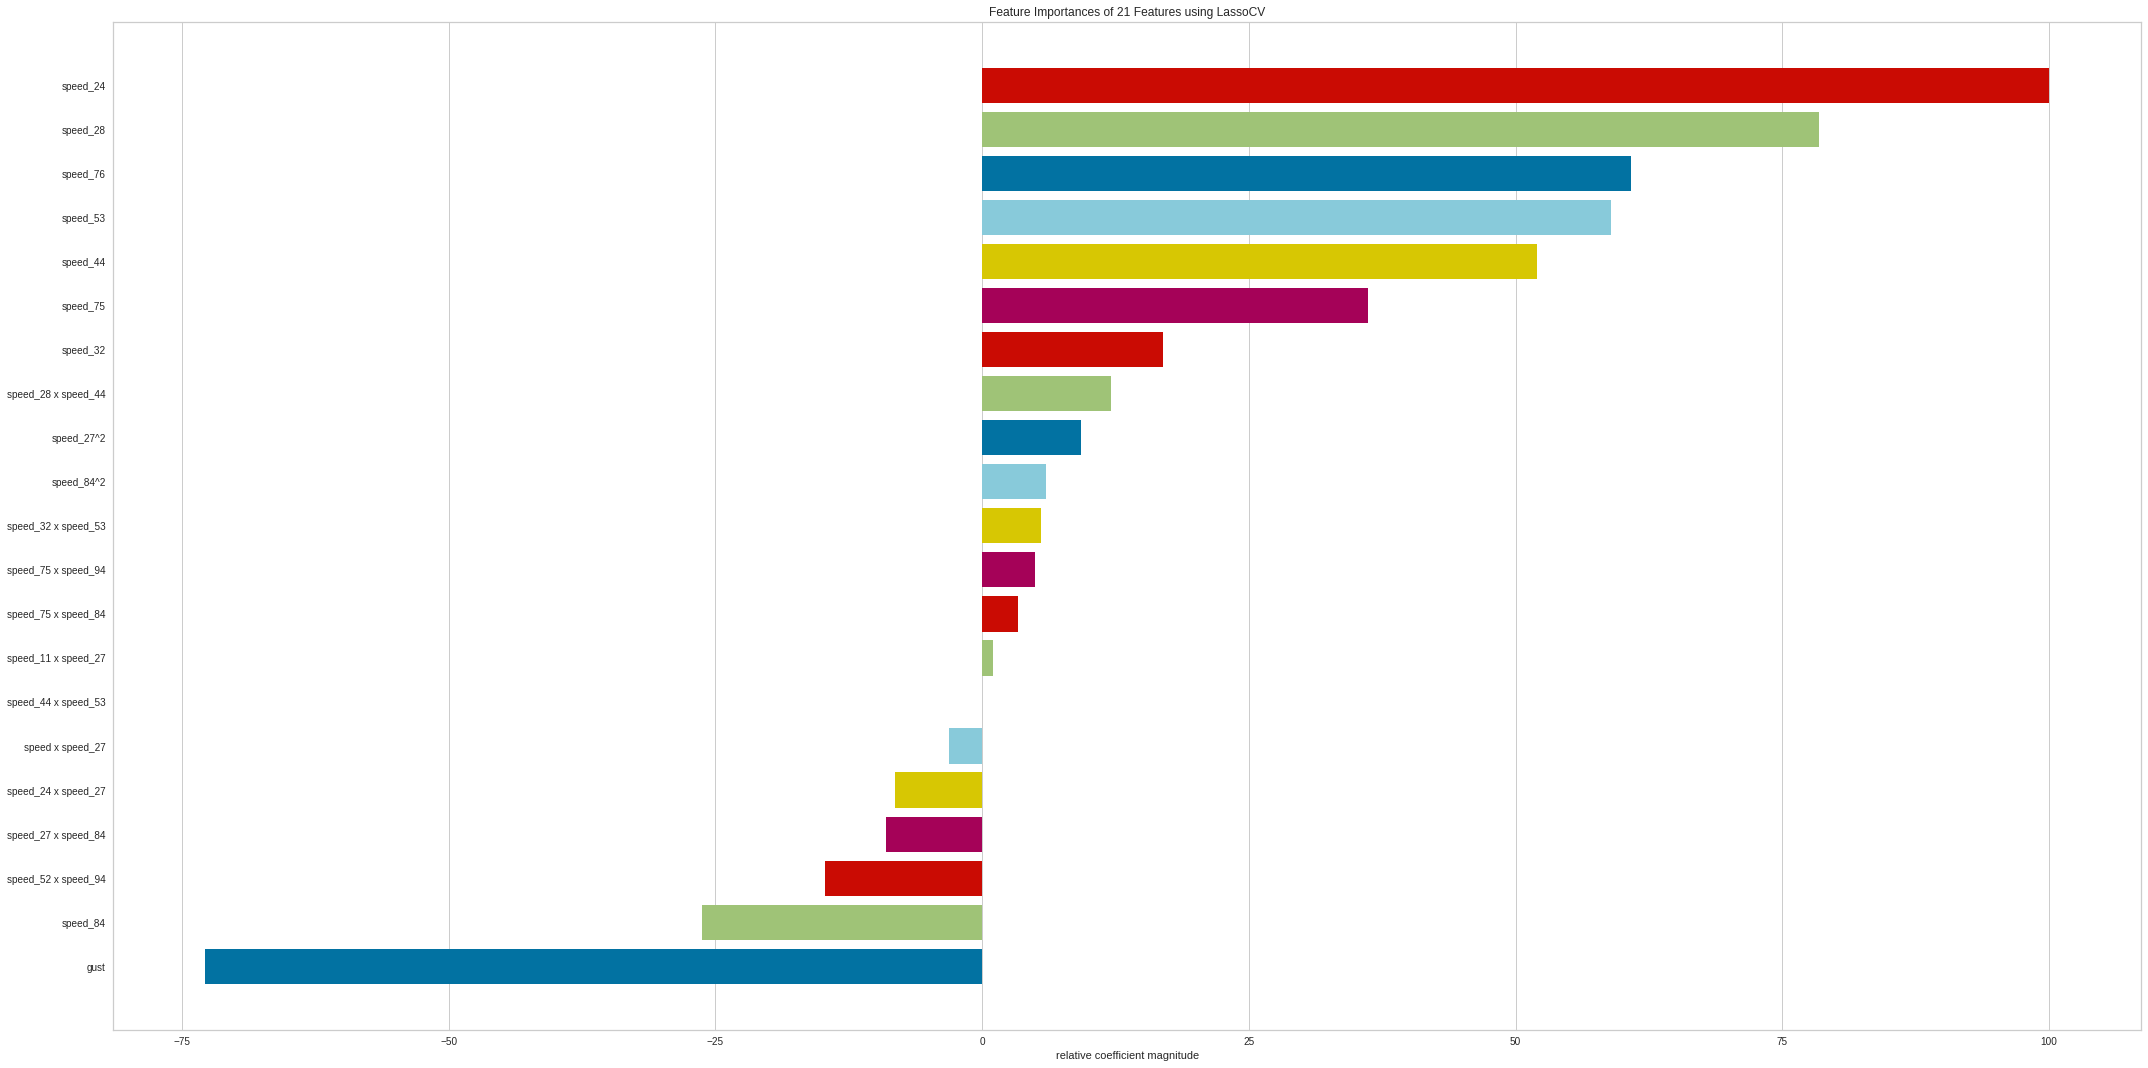

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 21 Features using LassoCV'}, xlabel='relative coefficient magnitude'>,
                   model=None)

In [98]:
feature_importances(
    LassoCV(normalize=True),
    data_poly_train[sorted_coef_.keys()],
    y_train,
)

##  RF with polynomial features

In [99]:
rf = RandomForestRegressor(n_jobs=4).fit(X=data_poly_train, y=y_train)

In [100]:
rf.score(X=data_poly_test, y=y_test)

0.8854109537488264

In [101]:
dict_coef_rf = {
    key: value
    for key, value in zip(data_poly_train.columns.tolist(), rf.feature_importances_)
}

In [102]:
sorted_coef_RF = {
    key: value
    for key, value in sorted(
        dict_coef_rf.items(), key=lambda item: abs(item[1]), reverse=True
    )
    if abs(value) > 10 ** -3
}

In [64]:
# sorted_coef_RF

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


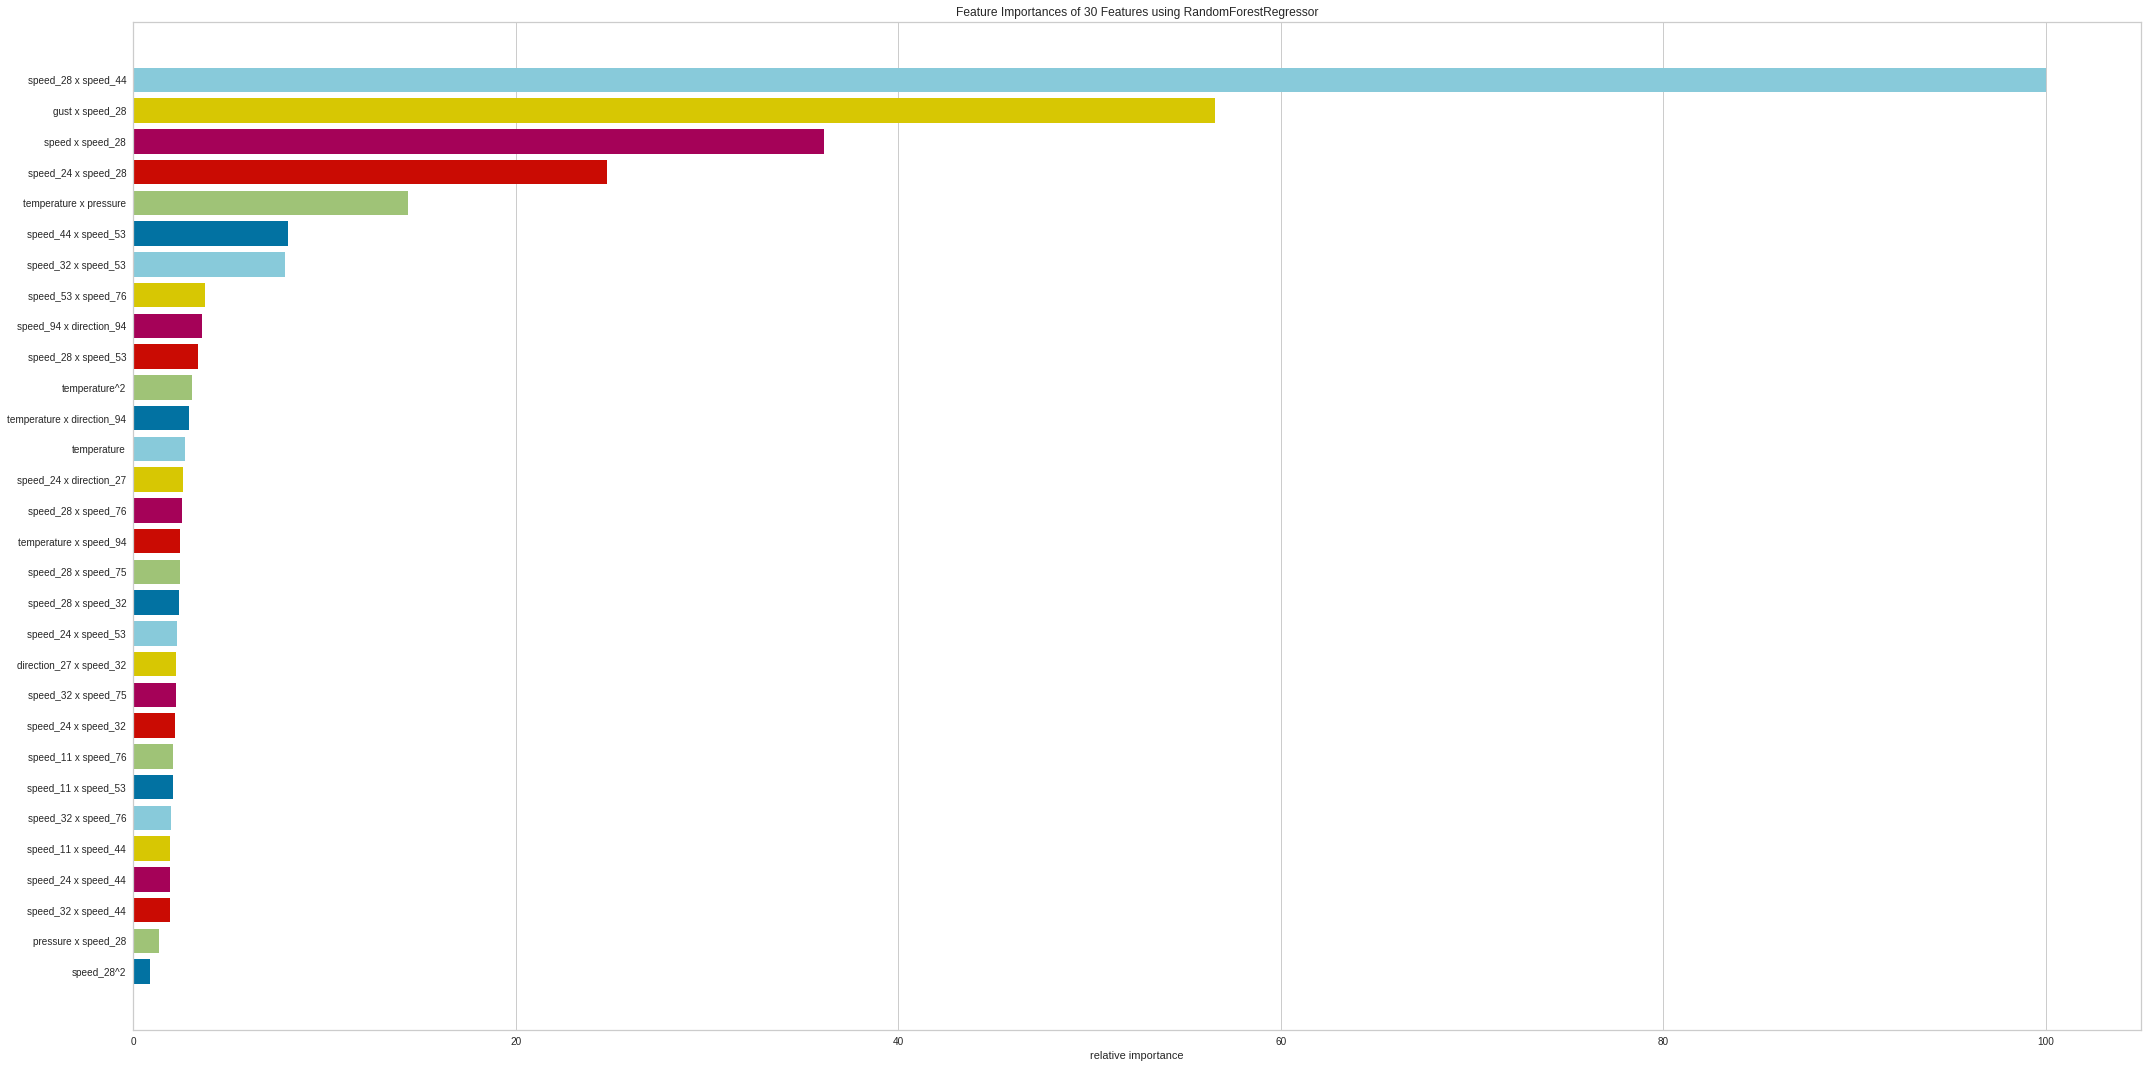

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 30 Features using RandomForestRegressor'}, xlabel='relative importance'>,
                   model=None)

In [103]:
feature_importances(
    RandomForestRegressor(n_jobs=4),
    data_poly_train[sorted_coef_RF.keys()],
    y_train,
)

## All Features

In [111]:
new_data_train = pd.concat(objs=[data_inertia, data_poly_train], axis="columns")
new_data_train = new_data_train.loc[:, ~new_data_train.columns.duplicated()].dropna()

new_data_test = pd.concat(objs=[data_inertia_test, data_poly_test], axis="columns")
new_data_test = new_data_test.loc[:, ~new_data_test.columns.duplicated()].dropna()

In [112]:
lasso = LassoCV(normalize=True, n_jobs=4)
lasso.fit(X=new_data_train, y=y_train[new_data_train.index])

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.035676615599069095, tolerance: 0.025701373408435313
  tol, rng, random, positive)
/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9900635611699826, tolerance: 0.031783601876579005
  positive)


LassoCV(n_jobs=4, normalize=True)

In [113]:
lasso.score(X=new_data_test, y=y_test[new_data_test.index])

0.8987749972990741

In [114]:
dict_coef = {
    key: value for key, value in zip(new_data_train.columns.tolist(), lasso.coef_)
}

In [115]:
sorted_coef_ = {
    key: value
    for key, value in sorted(
        dict_coef.items(), key=lambda item: abs(item[1]), reverse=True
    )
    if abs(value) > 10 ** -3.2
}

In [116]:
# sorted_coef_

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


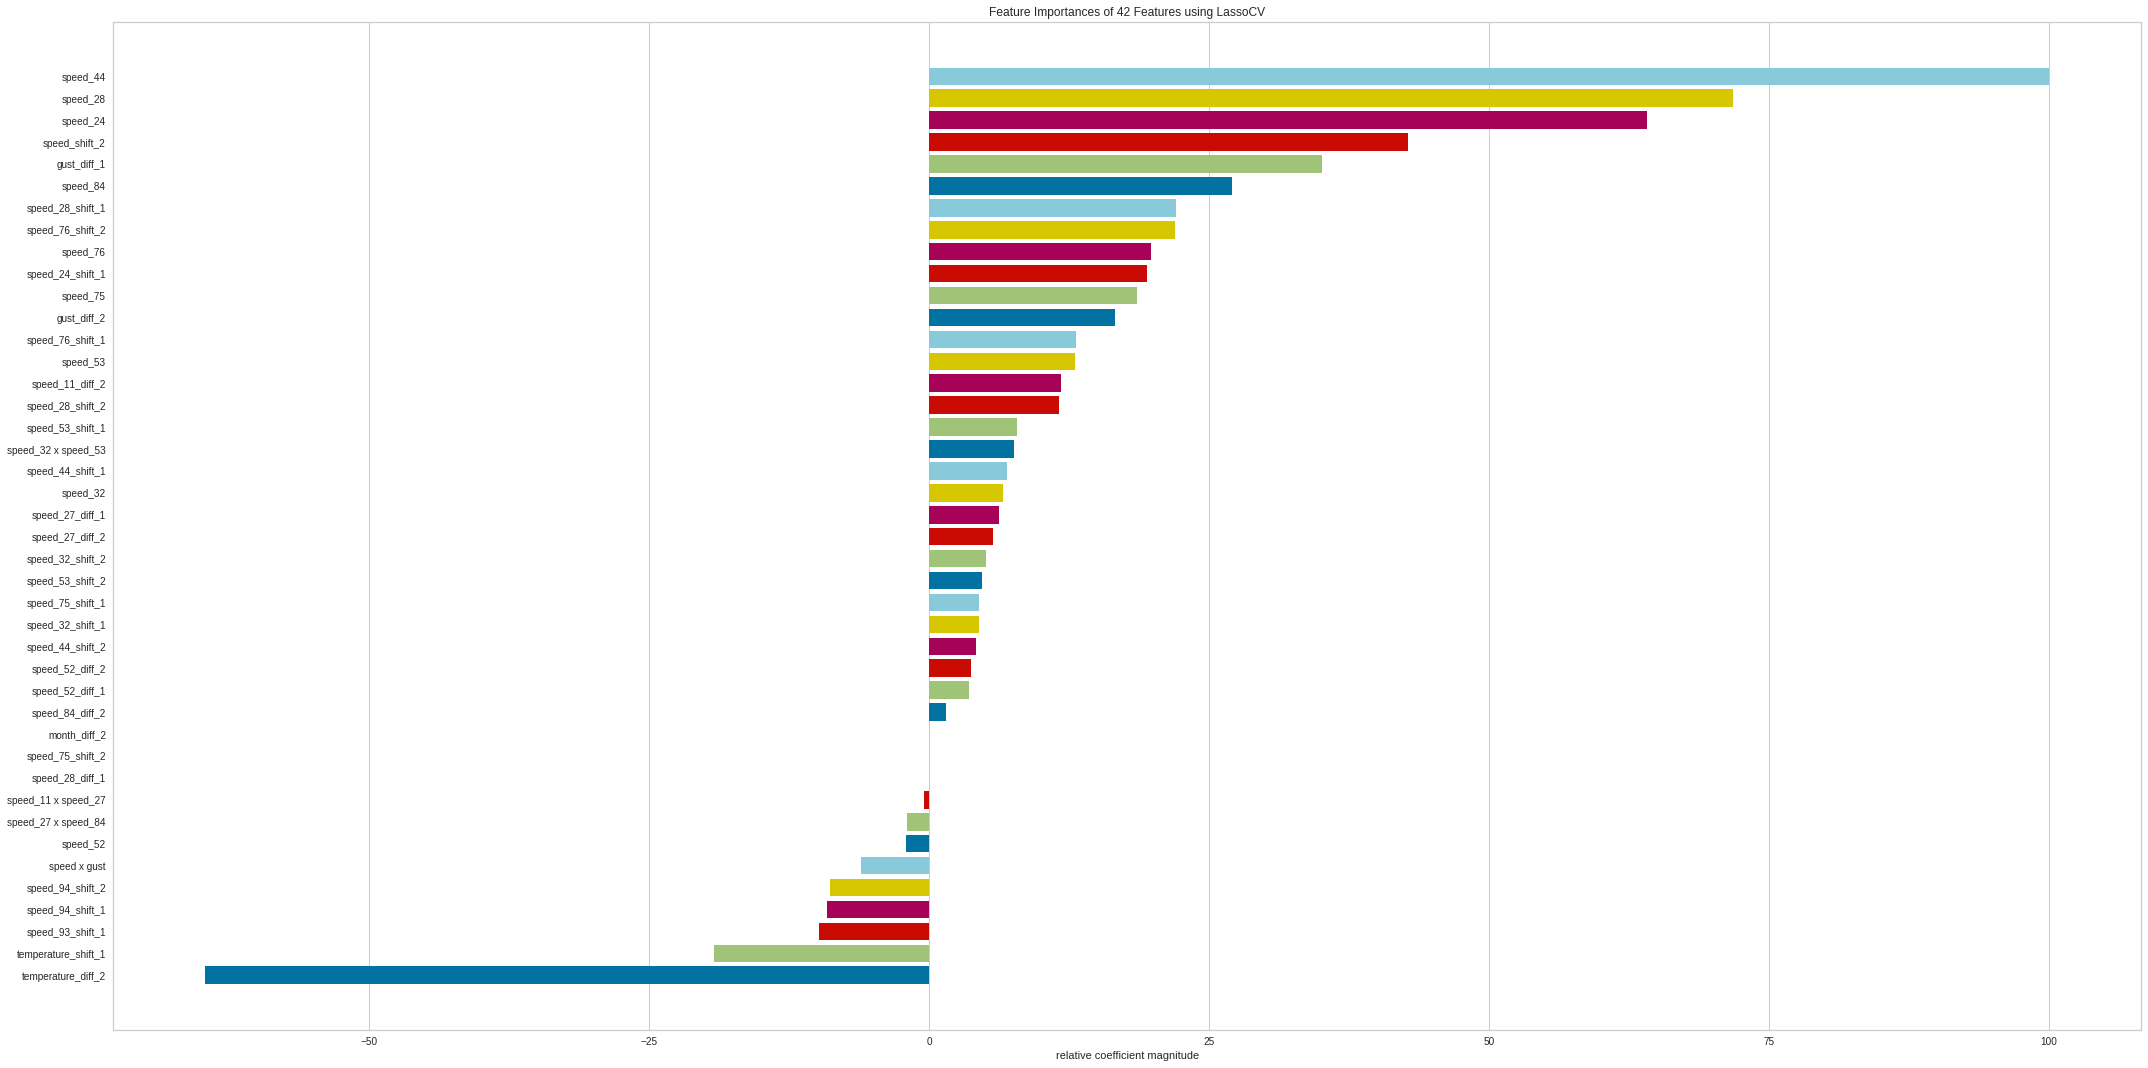

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 42 Features using LassoCV'}, xlabel='relative coefficient magnitude'>,
                   model=None)

In [117]:
feature_importances(
    LassoCV(normalize=True),
    new_data_train[sorted_coef_.keys()],
    y_train[new_data_train.index],
)

##  RF with all features

In [118]:
rf = RandomForestRegressor(n_jobs=4).fit(
    X=new_data_train, y=y_train[new_data_train.index]
)

In [119]:
rf.score(X=new_data_test, y=y_test[new_data_test.index])

0.9146647063061996

In [120]:
dict_coef_rf = {
    key: value
    for key, value in zip(new_data_train.columns.tolist(), rf.feature_importances_)
}

In [121]:
sorted_coef_RF = {
    key: value
    for key, value in sorted(
        dict_coef_rf.items(), key=lambda item: abs(item[1]), reverse=True
    )
    if abs(value) > 10 ** -3
}

In [122]:
# sorted_coef_RF

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


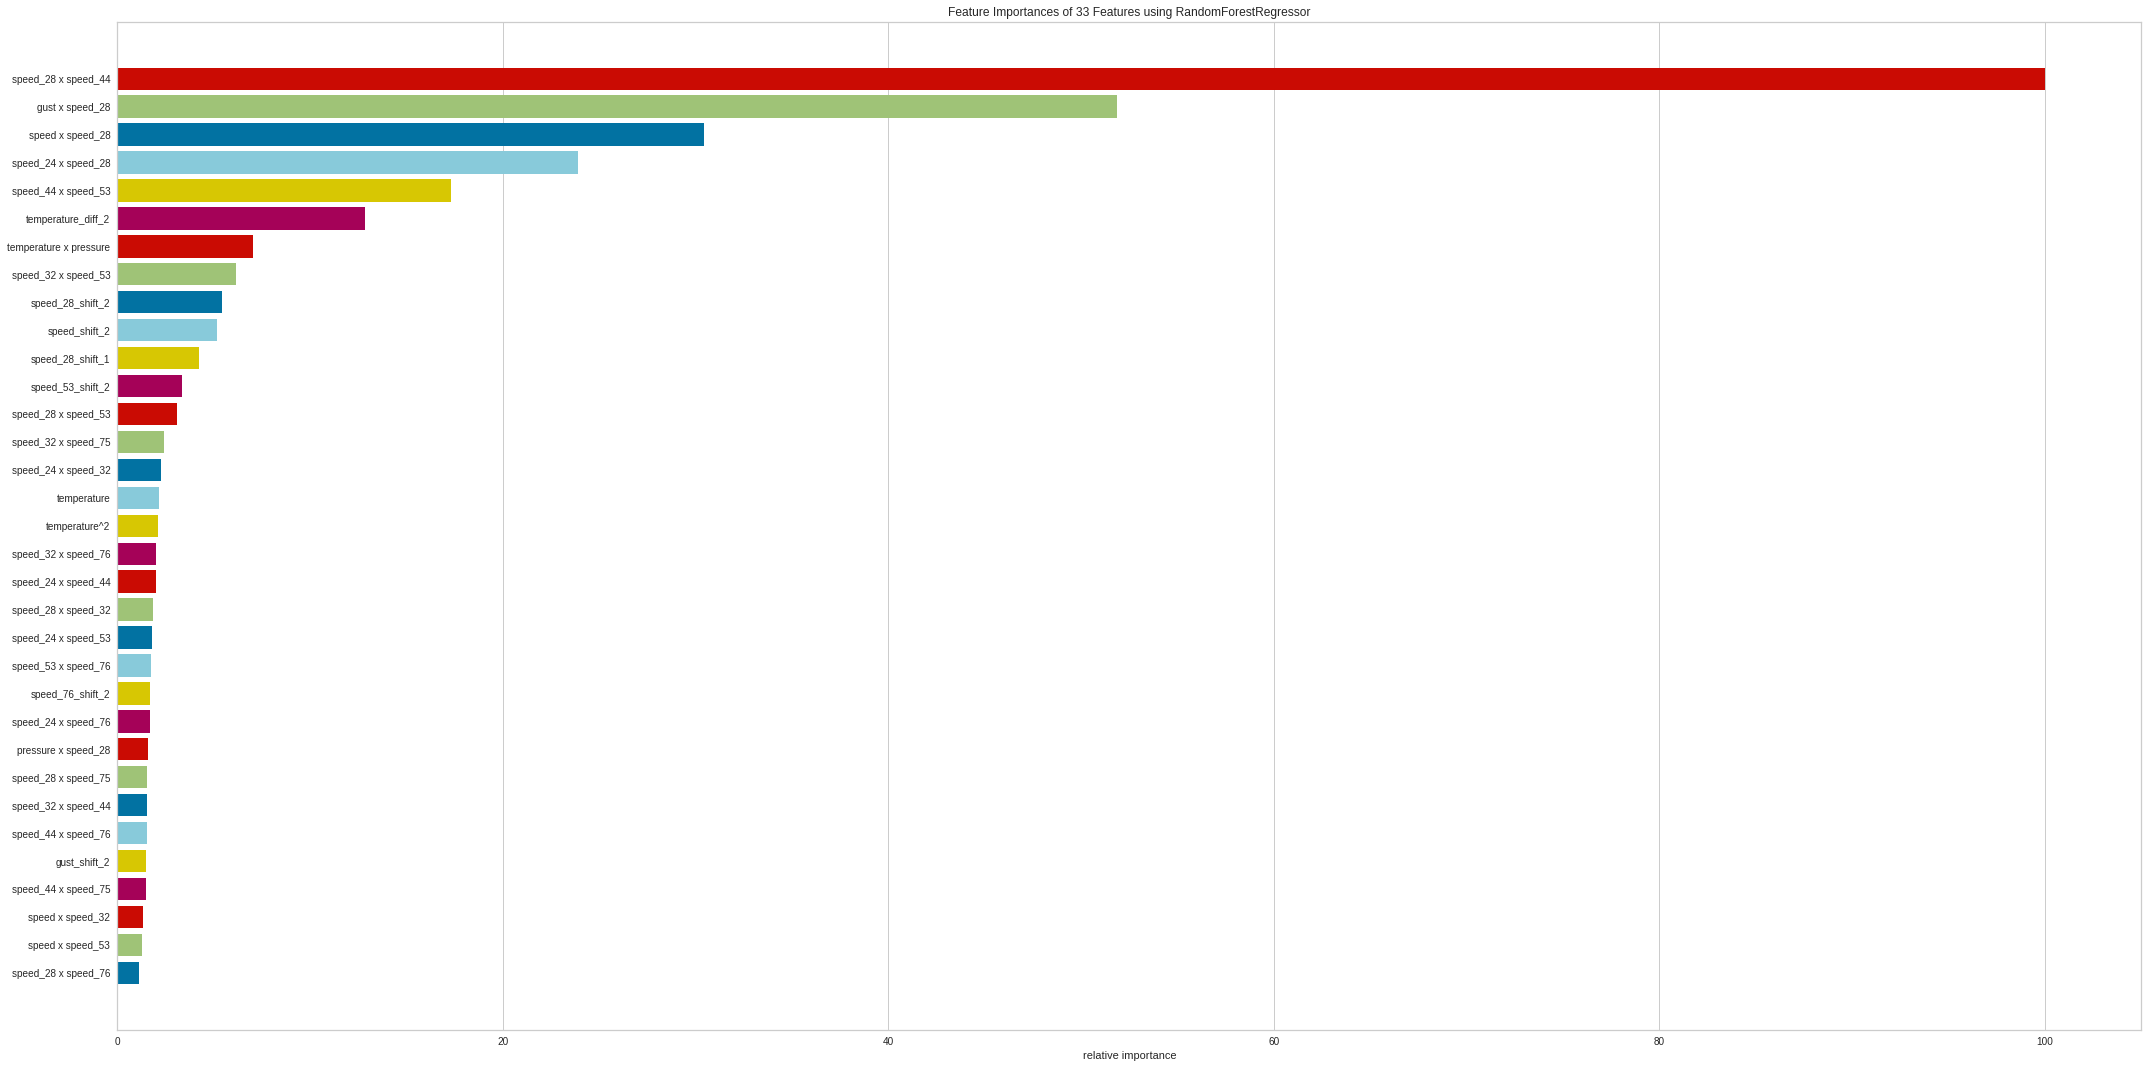

/home/gaspard-louis.charles/Documents/git/wind-power/venv/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 33 Features using RandomForestRegressor'}, xlabel='relative importance'>,
                   model=None)

In [123]:
feature_importances(
    RandomForestRegressor(n_jobs=4),
    new_data_train[sorted_coef_RF.keys()],
    y_train[new_data_train.index],
)

In [126]:
lasso_set = set(sorted_coef_.keys())

In [127]:
rf_set = set(sorted_coef_RF.keys())

In [131]:
extended_features = list(lasso_set.union(rf_set))

In [132]:
extended_features

['temperature_diff_2',
 'speed_76_shift_1',
 'speed_27 x speed_84',
 'gust_shift_2',
 'speed_94_shift_2',
 'speed_76',
 'speed_28 x speed_76',
 'speed_84',
 'speed_93_shift_1',
 'temperature',
 'speed_24 x speed_53',
 'speed_32 x speed_44',
 'speed_28 x speed_32',
 'speed x speed_28',
 'pressure x speed_28',
 'speed_84_diff_2',
 'speed_28_shift_1',
 'speed_32',
 'speed_53_shift_1',
 'speed_53 x speed_76',
 'speed_28 x speed_53',
 'speed_32_shift_1',
 'speed x gust',
 'speed_shift_2',
 'temperature^2',
 'speed_28 x speed_75',
 'temperature x pressure',
 'speed_44 x speed_76',
 'speed_24_shift_1',
 'speed_28_diff_1',
 'speed_32 x speed_53',
 'speed_53',
 'speed_24 x speed_28',
 'speed_32 x speed_76',
 'speed_75_shift_2',
 'gust_diff_2',
 'speed_44',
 'gust_diff_1',
 'speed_27_diff_2',
 'speed_32 x speed_75',
 'speed x speed_32',
 'speed_44 x speed_53',
 'speed_94_shift_1',
 'speed_75',
 'gust x speed_28',
 'speed_52_diff_2',
 'speed_44 x speed_75',
 'speed_52_diff_1',
 'speed_24',
 'spee